In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilibs as ul

In [2]:
timepoints = pd.read_csv(r"D:\PPMI_UA_2021\Database\timepoints.csv")
source = r"D:\PPMI_UA_2021\Flight Data"

In [4]:
storage = {}
disp = [i*250 for i in range(15)]
for ifile, file in enumerate(timepoints.fname.tolist()):
    if ifile in disp:
        print(f"{ifile:4.0f}  ... {file} ...")
    idx1 = int(timepoints.tp114.iloc[ifile])
    idx2 = int(timepoints.tp115.iloc[ifile])
    df = pd.read_csv(source + os.path.sep + file +str(".zip"),compression='zip')
    flap_te_pos =  ul.interpnan(df["flap_te_pos"][idx1-20:idx2+20])
    flap_te_pos = flap_te_pos.loc[idx1:idx2].to_numpy() 
    storage[file] = flap_te_pos
storage = pd.DataFrame(storage)
storage.to_csv(r"D:\PPMI_UA_2021\Database\flap_te_pos.csv", index=False)

   0  ... flight_10054 ...
 250  ... flight_13822 ...
 500  ... flight_17667 ...
 750  ... flight_20737 ...
1000  ... flight_24048 ...
1250  ... flight_29115 ...
1500  ... flight_32197 ...
1750  ... flight_35271 ...
2000  ... flight_39205 ...
2250  ... flight_42954 ...
2500  ... flight_46924 ...
2750  ... flight_50266 ...
3000  ... flight_54148 ...
3250  ... flight_57404 ...
3500  ... flight_61816 ...


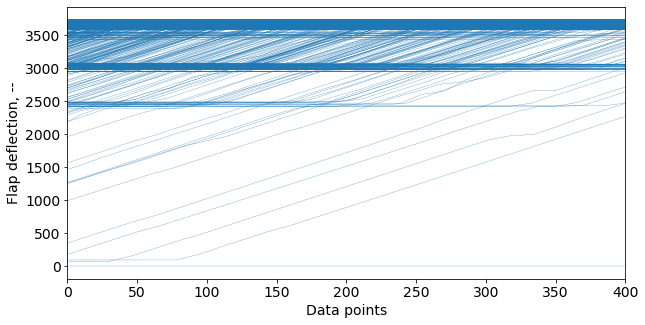

In [3]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\flap_te_pos.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy(), '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Flap deflection, --", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\flap_te_pos.png")

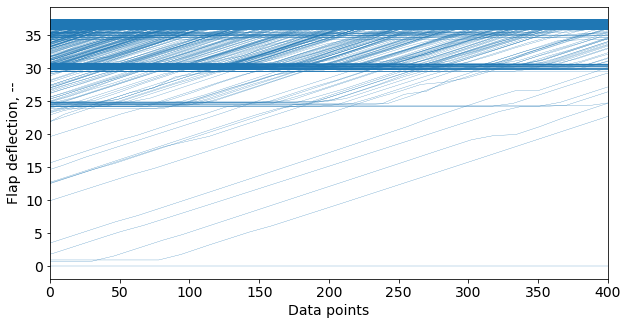

In [4]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\flap_te_pos.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy() / 100, '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Flap deflection, --", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\flap_te_pos (deg).png")

In [2]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\flap_te_pos.csv")
counter, sampling, duration = 0, 16, 5
min_flap_deg = 30
flap_flag = []
for ifile, file in enumerate(df.columns.tolist()):
    flap_deg = df[file].to_numpy() / 100
    for irow, _ in enumerate(flap_deg):
        if irow >= flap_deg.shape[0] - sampling * duration:
            flap_flag.append(0)
            break
        else:
            flag = flap_deg[irow:irow + sampling * duration] < min_flap_deg
            if sum(flag) >= sampling * duration:
                flap_flag.append(1)
                print(f"{ifile:4.0f} ... {file} ... Unstable")
                counter += 1
                break
sop_criteria = pd.read_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv")
sop_criteria["flap"] = flap_flag
sop_criteria.to_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv", index=False)

 153 ... flight_12061 ... Unstable
 200 ... flight_12995 ... Unstable
 266 ... flight_14093 ... Unstable
 267 ... flight_14095 ... Unstable
 286 ... flight_14456 ... Unstable
 290 ... flight_14521 ... Unstable
 300 ... flight_14643 ... Unstable
 330 ... flight_15126 ... Unstable
 337 ... flight_15201 ... Unstable
 365 ... flight_15522 ... Unstable
 382 ... flight_15699 ... Unstable
 396 ... flight_15850 ... Unstable
 401 ... flight_15897 ... Unstable
 405 ... flight_16023 ... Unstable
 419 ... flight_16192 ... Unstable
 428 ... flight_16520 ... Unstable
 451 ... flight_16877 ... Unstable
 495 ... flight_17579 ... Unstable
 496 ... flight_17606 ... Unstable
 498 ... flight_17661 ... Unstable
 545 ... flight_18241 ... Unstable
 556 ... flight_18375 ... Unstable
 563 ... flight_18431 ... Unstable
 574 ... flight_18647 ... Unstable
 575 ... flight_18757 ... Unstable
 611 ... flight_19082 ... Unstable
 614 ... flight_19096 ... Unstable
 644 ... flight_19430 ... Unstable
 648 ... flight_1947

In [3]:
counter

111